###                   Sentiment Analysis of Real-time Flipkart Product Reviews


###  Objective
The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.


### Modeling Approach
1. Model Selection: Train and evaluate various machine learning and deep learning models using the embedded text data.
2. Evaluation Metric: Use the F1-Score as the evaluation metric to assess the performance of the models in classifying sentiment.


###   Steps Involved in Sentimental Analysis
 ### 1.Text Cleaning: Remove special characters, punctuation, and stopwords from the review text.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\deshp\OneDrive\Desktop\internship tasks\sentimental analysis\reviews_badminton\data.csv')

In [3]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [6]:
df['Review text'].fillna(df['Review text'].mode()[0],inplace=True)

In [7]:
df['Review text']

0       Nice product, good quality, but price is now r...
1       They didn't supplied Yonex Mavis 350. Outside ...
2       Worst product. Damaged shuttlecocks packed in ...
3       Quite O. K. , but nowadays  the quality of the...
4       Over pricedJust â?¹620 ..from retailer.I didn'...
                              ...                        
8513                                        GoodREAD MORE
8514                                        GoodREAD MORE
8515                                        GoodREAD MORE
8516                                        GoodREAD MORE
8517                                        GoodREAD MORE
Name: Review text, Length: 8518, dtype: object

In [8]:
df['Place of Review']

0        Certified Buyer, Chirakkal
1        Certified Buyer, Hyderabad
2       Certified Buyer, Dharmapuri
3          Certified Buyer, Chennai
4                               NaN
                   ...             
8513                            NaN
8514                            NaN
8515                            NaN
8516                            NaN
8517                            NaN
Name: Place of Review, Length: 8518, dtype: object

In [9]:
df['Review text'].value_counts()


GoodREAD MORE                                                                                                                                                                                                                                                                                                                                                            703
NiceREAD MORE                                                                                                                                                                                                                                                                                                                                                            273
goodREAD MORE                                                                                                                                                                                                                                                                 

In [10]:
df['Ratings'].value_counts()

5    5080
4    1746
1     769
3     615
2     308
Name: Ratings, dtype: int64

In [11]:
df['Place of Review'].value_counts()

Certified Buyer, Bengaluru          319
Certified Buyer, Hyderabad          251
Certified Buyer, Chennai            240
Certified Buyer, Bangalore          212
Certified Buyer, New Delhi          155
                                   ... 
Certified Buyer, Dhubri District      1
Certified Buyer, Kathanian            1
Certified Buyer, Rajnagar             1
Certified Buyer, Gundlupet            1
Certified Buyer, Raebareli            1
Name: Place of Review, Length: 2337, dtype: int64

In [12]:
df.duplicated().sum()

4

In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(8514, 8)

<AxesSubplot:xlabel='Ratings', ylabel='count'>

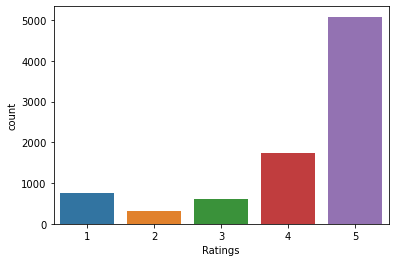

In [15]:
sns.countplot(x='Ratings',data=df)

In [16]:
# Define the classify_review function
def classify_review(rating):
    if rating >= 3:
        return 'Positive'
    else:
        return 'Negative'



In [17]:
df['Ratings'] = df['Ratings'].apply(classify_review)

C:\Users\deshp\AppData\Local\Temp\ipykernel_15888\1564057766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ratings'] = df['Ratings'].apply(classify_review)


### Input variable & Output variable

In [18]:
#Independent variable
x=df[["Review text"]]

In [19]:
x

,Review text
0,"Nice product, good quality, but price is now r..."
1,They didn't supplied Yonex Mavis 350. Outside ...
2,Worst product. Damaged shuttlecocks packed in ...
3,"Quite O. K. , but nowadays the quality of the..."
4,Over pricedJust â?¹620 ..from retailer.I didn'...
...,...
8509,Not sure why we have charged for this product ...
8510,GoodREAD MORE
8512,GoodREAD MORE
8513,GoodREAD MORE


In [20]:
#Dependent variable
y=df[["Ratings"]]

In [21]:
y

,Ratings
0,Positive
1,Negative
2,Negative
3,Positive
4,Negative
...,...
8509,Negative
8510,Negative
8512,Negative
8513,Positive


###  Splitting the data into training and testing data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=35)

###  2. Text Normalization: Perform lemmatization or stemming to reduce words to their base forms.

In [24]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [25]:
stem = PorterStemmer()

In [26]:
lemma = WordNetLemmatizer()

In [27]:
import re
def preprocess(data):
    
    # removes special characters
    sentence = re.sub("[^a-zA-Z]"," ",data)
    
    # converts words to lowercase
    sentence = sentence.lower()
    
    # tokenization
    sentence = sentence.split()
    
    #removes the stop words
    sentence = [word for word in sentence if word not in stopwords.words('english')]
    
    # can apply stem or lemm
    # applying lemmatization
    sentence = [lemma.lemmatize(word) for word in sentence]
    
    sentence=  " ".join(sentence)
    
    return sentence

In [28]:
#applying preprocessing on test_data
x_train= x_train['Review text'].apply(preprocess)

In [29]:
x_train

337                                     good shutles read
3460                                               okread
4793                                              badread
7747    good quality delivered earlier expected date read
5333                               okay okay shuttlesread
                              ...                        
3321                             great perfect defectread
3007                                     quality goodread
7148    shuttle good feather shuttle flight life good ...
1295                                 good shuttlecockread
5833                                     nice productread
Name: Review text, Length: 6811, dtype: object

In [30]:
#applying preprocessing on test_data
x_test = x_test['Review text'].apply(preprocess)

In [31]:
x_test 

7890                                    greatread
1587           original awesome love flipkartread
6624    bad quality shuttle pathetic packing read
8269                                     goodread
8079                             shuttle goodread
                          ...                    
6863                                     niceread
334                                      goodread
3291                             good qualityread
987             one best shuttle outdoor playread
6001      good product best delivery flipkartread
Name: Review text, Length: 1703, dtype: object

In [32]:
import pandas as pd

# Sample DataFrame
data = {'Ratings': ['1', '2', '3', '4', '5']}
df = pd.DataFrame(data)

# Convert the 'Ratings' column to numeric type
df['Ratings'] = pd.to_numeric(df['Ratings'])

# Define the classify_review function
def classify_review(rating):
    if rating >= 3.0:
        return 'Positive'
    else:
        return 'Negative'

# Apply the classify_review function to the 'Ratings' column
df['Ratings'] = df['Ratings'].apply(classify_review)

# Display the DataFrame with the added 'Sentiment' column
print(df)


    Ratings
0  Negative
1  Negative
2  Positive
3  Positive
4  Positive


###  3. Numerical Feature Extraction: Apply techniques like Bag-of-Words (BoW), Term Frequency-Inverse    Document Frequency (TF-IDF), Word2Vec (W2V), and BERT models for feature extraction.


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
%time x_train_num = cv.fit_transform(x_train)

CPU times: total: 0 ns
Wall time: 40.1 ms


In [34]:
%time x_test_num = cv.transform(x_test)

CPU times: total: 0 ns
Wall time: 9.4 ms


### Building a model

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb_model= MultinomialNB()


In [36]:
nb_model.fit(x_train_num,y_train)

C:\Users\deshp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [37]:
x_train_num.shape

(6811, 2667)

In [38]:
y_train.shape

(6811, 1)

### Evaluation

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [40]:
y_train_pred = nb_model.predict(x_train_num)

In [41]:
y_train_pred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [42]:
train_score=accuracy_score(y_train,y_train_pred)

In [43]:
train_score

0.931874908236676

In [44]:
y_pred=nb_model.predict(x_test_num)

In [45]:
y_pred

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [46]:
test_score=accuracy_score(y_pred,y_test)

In [47]:
test_score

0.9242513211978861

In [48]:
confusion_matrix(y_train, y_train_pred)

array([[ 509,  357],
       [ 107, 5838]], dtype=int64)

Text(0.5, 15.0, 'Predicted')

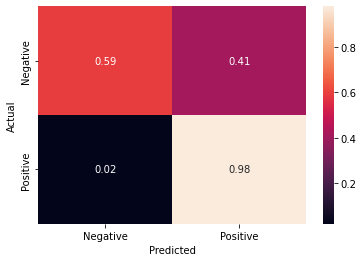

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')

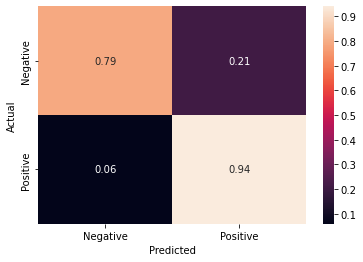

In [50]:
cm = confusion_matrix(y_pred,y_test)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [51]:
from joblib import Memory
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from gensim.models import Word2Vec

In [52]:
import warnings

warnings.filterwarnings('ignore')

In [53]:
from sklearn.metrics import f1_score
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
        'vectorization': [CountVectorizer(),TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1',  
                               return_train_score=True,
                               verbose=1)
    grid_search.fit(x_train, y_train)
    best_models[algo] = grid_search.best_estimator_
#     print('Score on Test Data:', grid_search.score(x_test, y_test, pos_label='Positive'))
    y_pred = grid_search.best_estimator_.predict(x_test)
    f1 = f1_score(y_test, y_pred, pos_label='Positive')  
    print('F1 Score on Test Data:', f1)

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
F1 Score on Test Data: 0.9548302011210024
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
F1 Score on Test Data: 0.9411371237458194
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
F1 Score on Test Data: 0.9360525406152783


In [63]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', DecisionTreeClassifier())])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    l1_ratio=0.4, penalty='elasticnet',
                                    solver='saga'))])



In [59]:
import joblib
import os


In [75]:
save_dir = r'E:\saved_directries'

for name, model in best_models.items():
    print("*" * 10, name, "*" * 10)
    
    joblib.dump(model, os.path.join(save_dir, f'{name}.pkl'))
    loaded_model = joblib.load(os.path.join(save_dir, f'{name}.pkl'))
    
    %time y_test_pred = loaded_model.predict(x_test)

    f1 = f1_score(y_test, y_test_pred, pos_label='Positive')

    print("F1 Score (Positive Class):", f1)
    print("Model Size:", os.path.getsize(os.path.join(save_dir, f'{name}.pkl')), "Bytes")


********** naive_bayes **********
CPU times: total: 0 ns
Wall time: 35.7 ms
F1 Score (Positive Class): 0.9548302011210024
Model Size: 82190 Bytes
********** decision_tree **********
CPU times: total: 0 ns
Wall time: 13.4 ms
F1 Score (Positive Class): 0.9411371237458194
Model Size: 223140 Bytes
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 7.93 ms
F1 Score (Positive Class): 0.9360525406152783
Model Size: 58448 Bytes


In [77]:
import joblib

filepath = r'D:\flip_gan\best models'

try:
    model = joblib.load(filepath)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")


Error loading the model: [Errno 13] Permission denied: 'D:\\flip_gan\\best models'
